![](image_3.png)

# Business case study : Jamboree Education - Linear Regression


**About Jamboree-**

        Jamboree has helped thousands of students like you make it to top colleges abroad. 
        
        Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
        
        They recently launched a feature where students/learners can come to their website and check their probability of  
        
        getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian  
        
        perspective.



**Business Problem-**

        Jamboree wants to understand what factors are important in graduate admissions and how these factors are 
        
        interrelated among themselves. 
        
        It will also help predict one's chances of admission given the rest of the variables.
        

_**Importing Python Libraries necessary while carrying out data exploration & visualisation**_ -
    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')


_**Upload & read csv file in pandas dataframe**_ -
    

In [2]:
df = pd.read_csv("Jamboree_Admission.csv")


In [3]:
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.tail()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


--------------------------------------------------------------------------------------------------------------


**Observations on -**

    1) shape of data
    
    2) data types
    
    3) Statistical summary
    



In [5]:
df.shape


(500, 9)


    Dataset contains 500 rows and 9 columns.
    

In [6]:
df.size


4500

In [7]:
df.columns


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
df.nunique()


Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [10]:
df.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


-----------------------------------------------------------------------------------------------

**Data Cleaning -**

    Check for Missing values & Duplicates.
    



In [11]:
df.isna().sum()


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


    No missing values

In [12]:
df[df.duplicated()]


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit



    No duplicate records are found.



In [13]:
# Remove serial No. column as it is not necessary
df.drop(columns = ["Serial No."], inplace = True)


In [14]:
# Pre-processing 
df1 = df[['University Rating', 'SOP', 'LOR ','Research','GRE Score', 'TOEFL Score','CGPA','Chance of Admit ']]
# df1 = df1.rename(columns={'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'})
df1.head()


,University Rating,SOP,LOR,Research,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,4,4.5,4.5,1,337,118,9.65,0.92
1,4,4.0,4.5,1,324,107,8.87,0.76
2,3,3.0,3.5,1,316,104,8.00,0.72
3,3,3.5,2.5,1,322,110,8.67,0.80
4,2,2.0,3.0,0,314,103,8.21,0.65


---------------------------------------------------------------------------------------------------------


**EDA (Visual Analysis) -**

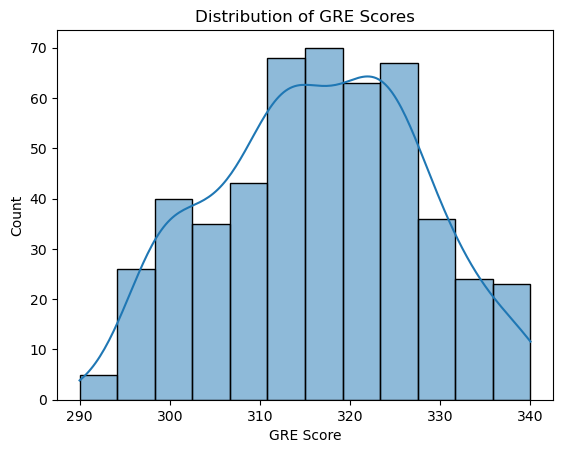

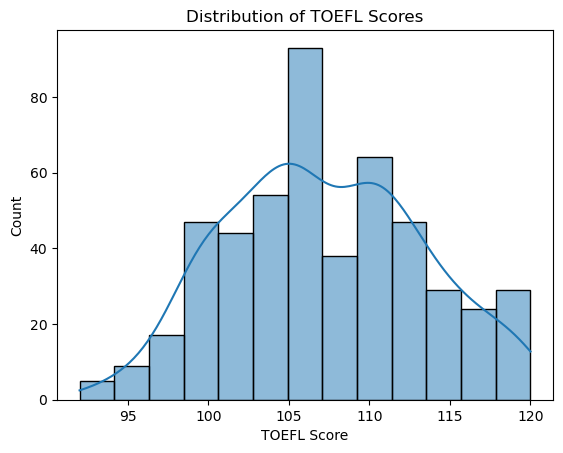

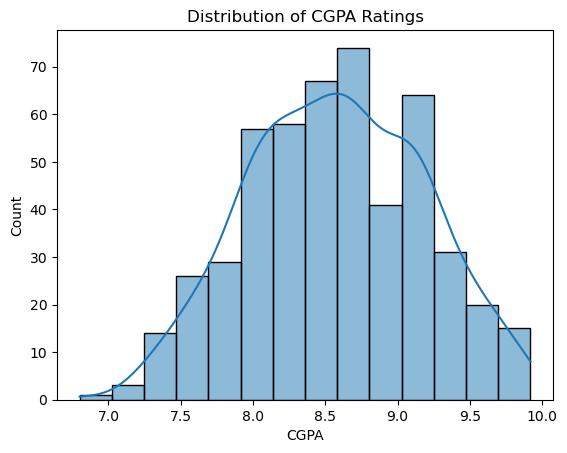

In [15]:
# Distribution Graphs
fig = sns.histplot(df['GRE Score'], kde = True)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.histplot(df['TOEFL Score'],kde = True)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.histplot(df['CGPA'],kde = True)
plt.title("Distribution of CGPA Ratings")
plt.show()


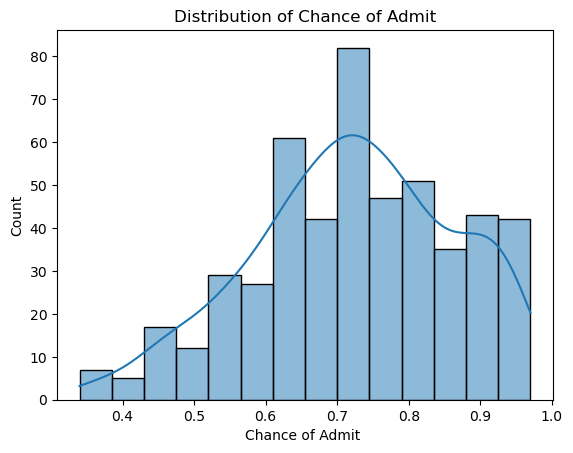

In [16]:
fig = sns.histplot(df['Chance of Admit '],kde = True)
plt.title("Distribution of Chance of Admit")
plt.show()


    Comments -
    
        1) GRE scores are between 290 and 340, with maximum students scoring in the range 310-330.
        
        2) TOEFL scores are between 90 and 120, with maximum students scoring around 105
        
        3) CGPA ranges between 7 and 10, with maximum students scoring around 8.5
        
        4) Chance of Admit is a probability percentage between 0 and 1, with maximum students scoring around 70%-75%


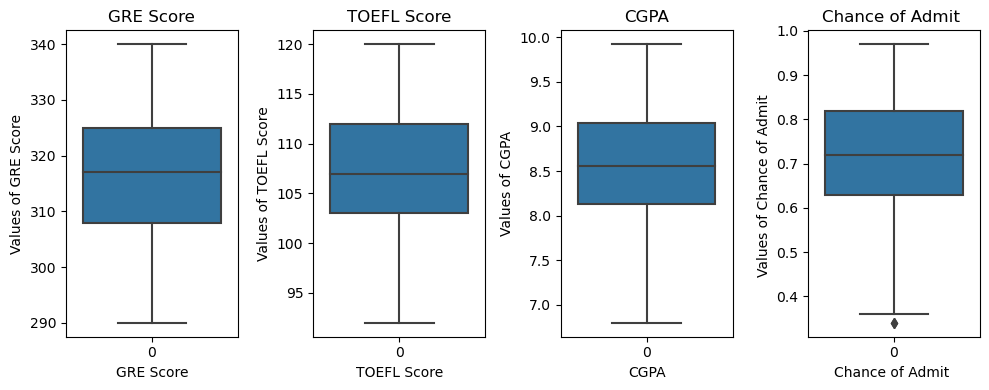

In [17]:
# Boxplots -
plt.figure(figsize=(10,4))
cols = ["GRE Score", "TOEFL Score", "CGPA", "Chance of Admit "]
i = 1

for col in cols:
  ax = plt.subplot(1,4,i)
  sns.boxplot(df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel(f'Values of {col}')
  i+=1

plt.tight_layout()
plt.show()


    We don't have outliers in this data.
    

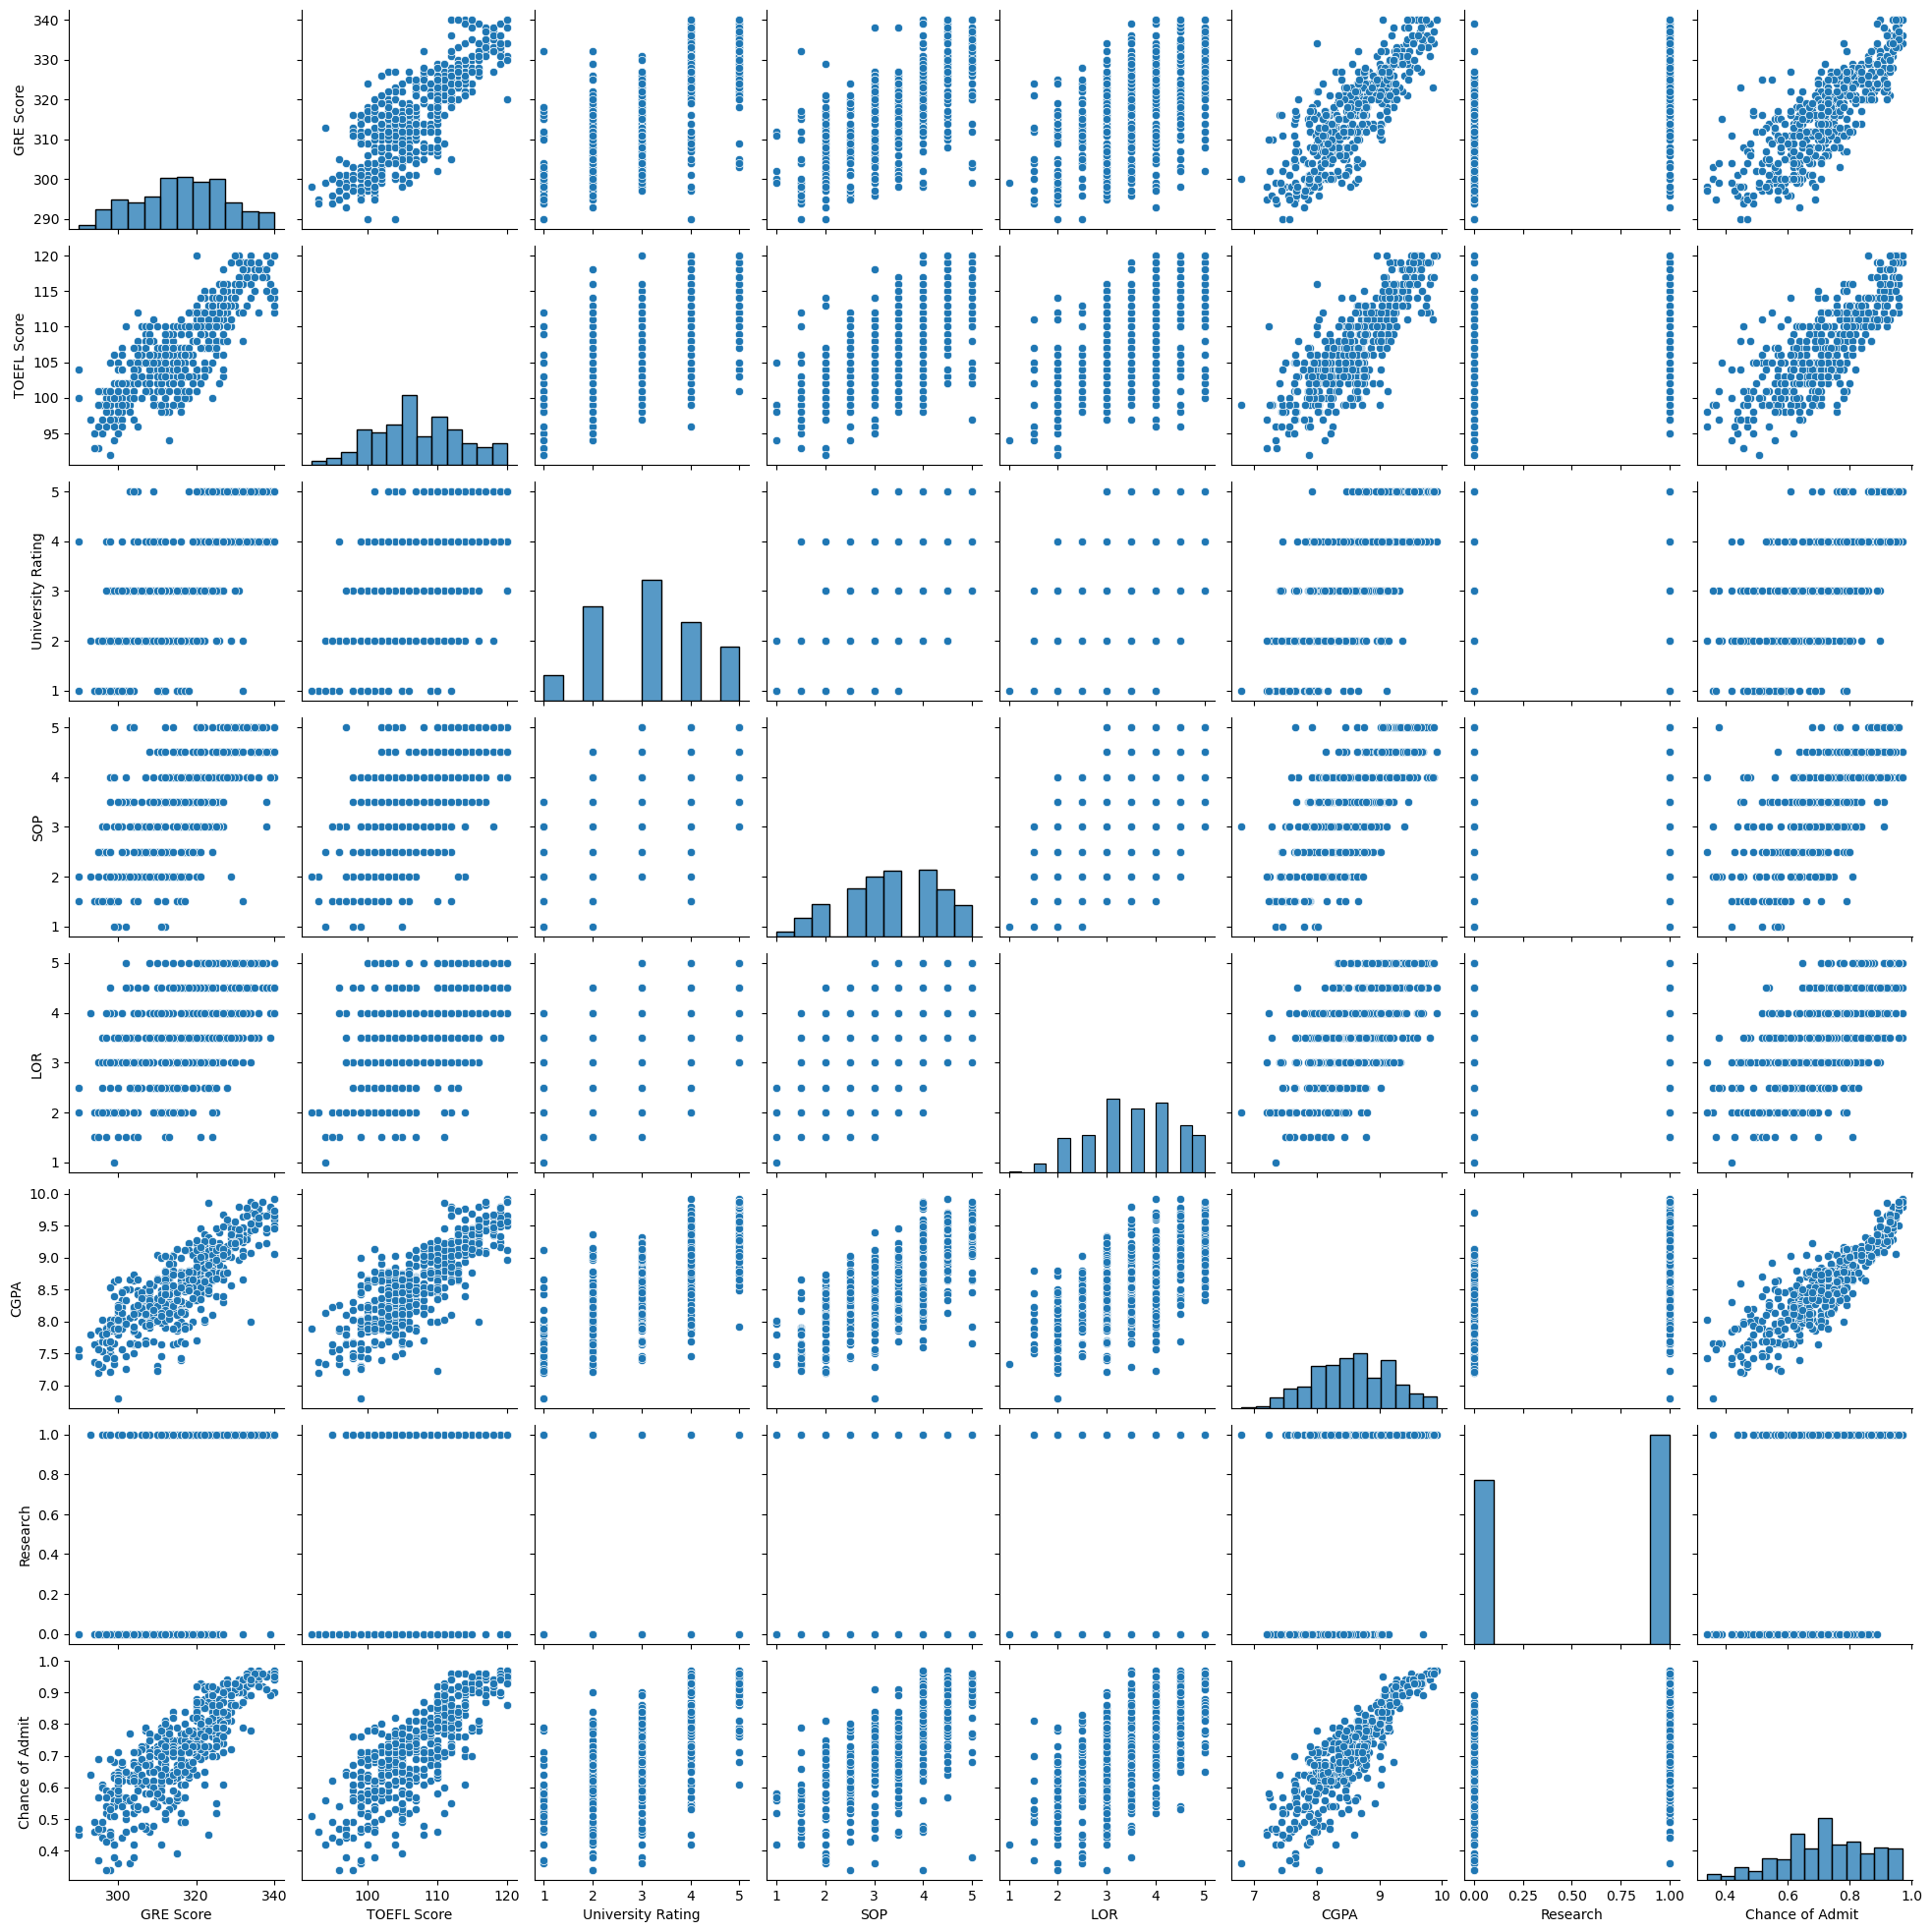

In [18]:
# Pairplot 
sns.pairplot(data = df)
plt.show()


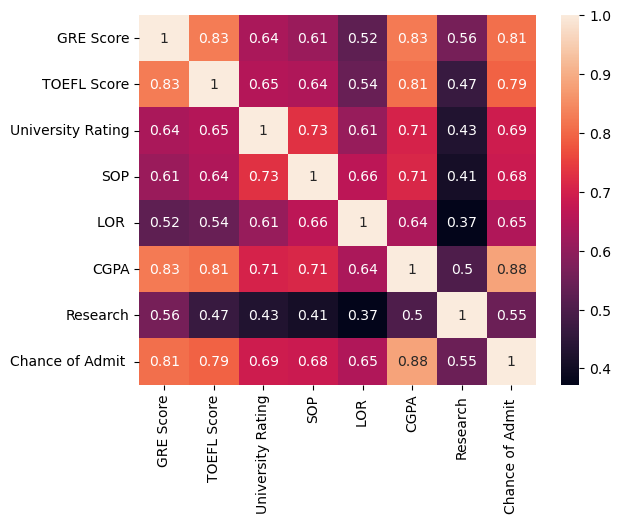

In [19]:
# Heatmap 

sns.heatmap(df.corr(), annot=True)
plt.show()



    Comments -
            
            1) Exam scores (GRE, TOEFL and CGPA) have a high positive correlation with chance of admit.
            
            2) While university ranking, rating of SOP and LOR also have an impact on chances of admit, 
            
            research is the only variable which doesn't have much of an impact.
            
            3) We can see from the scatterplot that the values of university ranking, SOP, LOR 
            
            and research are not continuous.


------------------------------------------------------------------------------------------------------------


**Data preparation for modeling -**


In [20]:
# Label encoding - 
le = LabelEncoder()
df1['University Rating'] = le.fit_transform(df1['University Rating'])
df1['SOP'] = le.fit_transform(df1['SOP'])
df1['LOR '] = le.fit_transform(df1['LOR '])
df1.head()


,University Rating,SOP,LOR,Research,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,3,7,7,1,337,118,9.65,0.92
1,3,6,7,1,324,107,8.87,0.76
2,2,4,5,1,316,104,8.00,0.72
3,2,5,3,1,322,110,8.67,0.80
4,1,2,4,0,314,103,8.21,0.65


In [21]:
# Min max scaling -
minmax_trans = MinMaxScaler()
minmax_trans.fit(df1)
scalerd_feature = minmax_trans.transform(df1)
df2 = pd.DataFrame(data = scalerd_feature,  columns = ['University Rating', 'SOP', 'LOR ', 'Research', 'GRE Score', 
                                                   'TOEFL Score', 'CGPA', 'Chance of Admit '])
df2


,University Rating,SOP,LOR,Research,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,0.75,0.875,0.875,1.0,0.94,0.928571,0.913462,0.920635
1,0.75,0.750,0.875,1.0,0.68,0.535714,0.663462,0.666667
2,0.50,0.500,0.625,1.0,0.52,0.428571,0.384615,0.603175
3,0.50,0.625,0.375,1.0,0.64,0.642857,0.599359,0.730159
4,0.25,0.250,0.500,0.0,0.48,0.392857,0.451923,0.492063
...,...,...,...,...,...,...,...,...
495,1.00,0.875,0.750,1.0,0.84,0.571429,0.711538,0.841270
496,1.00,1.000,1.000,1.0,0.94,0.892857,0.983974,0.984127
497,1.00,0.875,1.000,1.0,0.80,1.000000,0.884615,0.936508
498,0.75,0.750,1.000,0.0,0.44,0.392857,0.522436,0.619048


----------------------------------------------------------------------------------------------------------

**Model Building -**


In [22]:
# linear Regression

X = df2.drop(['Chance of Admit '], axis = 1)
y = df2['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)


In [23]:
X_train


,University Rating,SOP,LOR,Research,GRE Score,TOEFL Score,CGPA
472,0.75,0.750,0.875,1.0,0.74,0.857143,0.858974
29,0.25,0.125,0.250,0.0,0.40,0.250000,0.160256
21,0.75,0.500,0.250,0.0,0.70,0.785714,0.512821
104,0.50,0.625,0.500,1.0,0.72,0.714286,0.721154
186,0.50,0.625,0.500,1.0,0.54,0.535714,0.602564
...,...,...,...,...,...,...,...
114,0.50,0.625,0.500,1.0,0.42,0.464286,0.528846
401,0.25,0.500,0.500,0.0,0.50,0.464286,0.493590
223,0.25,0.500,0.750,0.0,0.36,0.607143,0.528846
95,0.75,0.125,0.375,0.0,0.28,0.285714,0.333333


In [24]:
y_train


472    0.888889
29     0.317460
21     0.571429
104    0.634921
186    0.793651
         ...   
114    0.396825
401    0.507937
223    0.587302
95     0.126984
499    0.793651
Name: Chance of Admit , Length: 400, dtype: float64

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)


0.8121801233488479

---------------------------------------------------------------------------------------------------------------

**Model Performance Evaluation (Linear Regression) -**


In [26]:
# Checking MAE, Score, RSME, R^2 and Adjusted R^2 for Linear Regression
print('The score of Linear Regression for Training Data:', model.score(X_train, y_train))
print('-' * 80)

print('The score of Linear Regression for Test Data:', model.score(X_test, y_test))
print('-' * 80)

print('Mean Absolute error:', mean_absolute_error(y_true = y_test, y_pred = y_pred))       # default squared =True
print('-' * 80)

print('Root Mean Squared Error:',mean_squared_error(y_true = y_test, y_pred = y_pred, squared = False))
print('-' * 80)

print('R^2:',r2_score(y_test, y_pred))
print('-' * 80)

print('Adjusted R^2: ',(1 - (1 - (r2_score(y_test, y_pred) ) ) * (len(y) - 1)
                        /(len(y) - X.shape[1] - 1) ))
print('-' * 80)


The score of Linear Regression for Training Data: 0.8237237332251778
--------------------------------------------------------------------------------
The score of Linear Regression for Test Data: 0.8121801233488479
--------------------------------------------------------------------------------
Mean Absolute error: 0.06667948787489475
--------------------------------------------------------------------------------
Root Mean Squared Error: 0.09832844767461875
--------------------------------------------------------------------------------
R^2: 0.8121801233488479
--------------------------------------------------------------------------------
Adjusted R^2:  0.8095078893314535
--------------------------------------------------------------------------------


    Comments -
    
        1) Since there is no major difference in the loss scores of training and test data, we can conclude that there 
        
        is no overfitting of the model.

        2) Mean Absolute Error of 0.06 shows that on an average, the absolute difference between the actual 
        
        and predicted values of chance of admit is 6%.
        
        3) Root Mean Square Error of 0.08 means that on an average, the root of squared difference between the actual 
        
        and predicted values is 8%.
        
        4) R2 Score of 0.87 means that our model captures 87% variance in the data.
        
        5) Adjusted R2 is an extension of R2 which shows how the number of features used changes the 
        
        accuracy of the prediction
        

In [27]:
# Linear regression using statsmodel library (Model coefficient)

X_train_1 = sm.add_constant(X_train)
model = sm.OLS(y_train.values,X_train).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              2593.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):                        0.00
Time:                        14:17:41   Log-Likelihood:                          379.43
No. Observations:                 400   AIC:                                     -744.9
Df Residuals:                     393   BIC:                                     -716.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [28]:
# Lasso & Ridge Regression 

model_ridge = Ridge(alpha = 3)
model_lasso = Lasso(alpha = 0.000001)

# Fitting the models to training data
model_ridge.fit(X_train, y_train)
model_lasso.fit(X_train, y_train)

# Predicting values for train and test data

y_train_ridge = model_ridge.predict(X_train)
y_test_ridge = model_ridge.predict(X_test)

y_train_lasso = model_lasso.predict(X_train)
y_test_lasso = model_lasso.predict(X_test)


In [29]:
# Evaluating Model Performance using Ridge Regression (L2)

print('The score of Ridge Regression for Training Data:', model_ridge.score(X_train, y_train))
print('-' * 80)

print('The score of Ridge Regression for Test Data:', model_ridge.score(X_test, y_test))
print('-' * 80)

print('Mean Absolute error:', mean_absolute_error(y_true = y_test, y_pred = y_test_ridge))       # default squared =True
print('-' * 80)

print('Root Mean Squared Error:',mean_squared_error(y_true = y_test, y_pred = y_test_ridge, squared = False),)
print('-' * 80)

print('R^2:',r2_score(y_test, y_test_ridge))
print('-' * 80)

print('Adjusted R^2: ',(1 - (1 - (r2_score(y_test, y_test_ridge) ) ) * (len(y) - 1)
                        /(len(y) - X.shape[1] - 1) ))
print('-' * 80)


The score of Ridge Regression for Training Data: 0.8133421711936532
--------------------------------------------------------------------------------
The score of Ridge Regression for Test Data: 0.8076532912272097
--------------------------------------------------------------------------------
Mean Absolute error: 0.069150923752111
--------------------------------------------------------------------------------
Root Mean Squared Error: 0.09950634795493729
--------------------------------------------------------------------------------
R^2: 0.8076532912272097
--------------------------------------------------------------------------------
Adjusted R^2:  0.8049166510617433
--------------------------------------------------------------------------------


In [55]:
# Evaluating Model Performance using Lasso Regression (L1)

print('The score of Lasso Regression for Training Data:', model_lasso.score(X_train, y_train))
print('-' * 80)

print('The score of Lasso Regression for Test Data:', model_lasso.score(X_test,y_test))
print('-' * 80)

print('Mean Absolute error:', mean_absolute_error(y_true = y_test, y_pred = y_test_lasso))       # default squared =True
print('-' * 80)

print('Root Mean Squared Error:',mean_squared_error(y_true = y_test, y_pred = y_test_lasso, squared = False))
print('-' * 80)

print('R^2:',r2_score(y_test, y_test_lasso))
print('-' * 80)

print('Adjusted R^2: ',(1 - (1 - (r2_score(y_test, y_test_lasso) ) ) * (len(y) - 1)
                        /(len(y) - X.shape[1] - 1) ))
print('-' * 80)


The score of Lasso Regression for Training Data: 0.8237237326143748
--------------------------------------------------------------------------------
The score of Lasso Regression for Test Data: 0.8121796820899668
--------------------------------------------------------------------------------
Mean Absolute error: 0.0666797738791459
--------------------------------------------------------------------------------
Root Mean Squared Error: 0.09832856317963369
--------------------------------------------------------------------------------
R^2: 0.8121796820899668
--------------------------------------------------------------------------------
Adjusted R^2:  0.8095074417944988
--------------------------------------------------------------------------------


-------------------------------------------------------------------------------------------


**Testing Assumptions of Linear Regression Model -**


    Assumption_1 --> Multicollinearity check by VIF score 
    

In [31]:
vif = pd.DataFrame()
X_t = X_train
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)


            Features    VIF
6               CGPA  40.70
4          GRE Score  28.86
5        TOEFL Score  28.07
1                SOP  19.12
2               LOR   14.46
0  University Rating  11.22
3           Research   3.27


    Comments -
    
        We see that almost all the variables (excluding research) have a very high level of colinearity. 
        
        This was also observed from the correlation heatmap which showed strong positive correlation 
        
        between GRE score, TOEFL score and CGPA.





    Removing the variable with highest VIF

In [32]:
cols2 = vif["Features"][1:].values
X2 = X_train[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(y_train, X2_sm).fit()
print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     215.2
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          7.48e-121
Time:                        14:17:42   Log-Likelihood:                 323.73
No. Observations:                 400   AIC:                            -633.5
Df Residuals:                     393   BIC:                            -605.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0754      0.01

    Dropping variables till VIF lesser than 5.
    

In [33]:
vif = pd.DataFrame()
X_t = X_train[cols2]
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

cols2 = vif["Features"][1:].values


            Features    VIF
1        TOEFL Score  25.14
0          GRE Score  24.15
2                SOP  17.88
3               LOR   13.08
4  University Rating  11.14
5           Research   3.27


In [34]:
vif = pd.DataFrame()
X_t = X_train[cols2]
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

cols2 = vif["Features"][1:].values


            Features    VIF
1                SOP  17.32
2               LOR   12.76
0          GRE Score  12.69
3  University Rating  11.00
4           Research   3.26


In [35]:
vif = pd.DataFrame()
X_t = X_train[cols2]
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

cols2 = vif["Features"][1:].values


            Features    VIF
1          GRE Score  11.64
0               LOR    9.65
2  University Rating   9.32
3           Research   3.26


In [36]:
vif = pd.DataFrame()
X_t = X_train[cols2]
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

cols2 = vif["Features"][1:].values


            Features   VIF
1  University Rating  7.62
0               LOR   7.54
2           Research  2.82


In [37]:
vif = pd.DataFrame()
X_t = X_train[cols2]
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)


   Features   VIF
0      LOR   2.63
1  Research  2.63


    Comments -
    
        We have dropped columns till vif > 5.
        
        hence we left with "LOR" and "Research".
        

    Assumption_2 --> The mean of residuals -
    

In [38]:
residuals = y_test.values - y_pred
residuals.reshape((-1,))
print('Mean of Residuals: ', residuals.mean())


Mean of Residuals:  -0.005478323024421282


    Comments -
    
        The mean of residuals is nearly zero.
        

    Assumption_3 --> Linearity of variables -
    

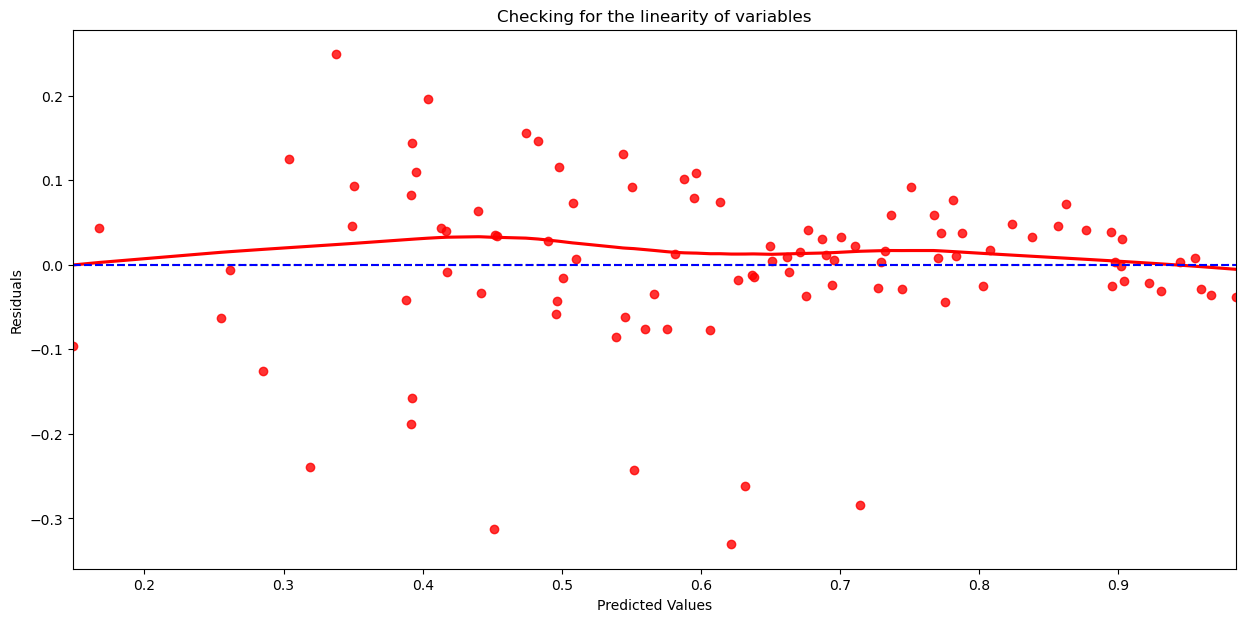

In [45]:
plt.figure(figsize = (15,7))
sns.residplot(x = y_pred, y = residuals, lowess = True, color = 'red')
plt.title('Checking for the linearity of variables')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y = 0, color = 'b', linestyle = '--')
plt.show() 


    Comments -
    
        Since the residual plot shows no clear pattern or trend in residuals, 
        
        we can conclude that linearity of variables does not exists.



    Assumption_4 --> Test for Homoscedasticity -
    


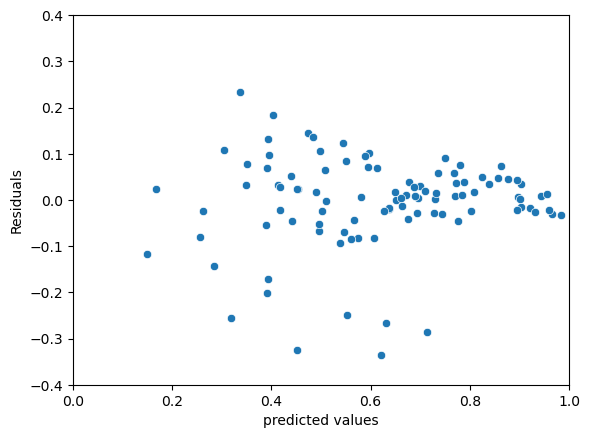

In [49]:
p = sns.scatterplot(x = y_pred, y = residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
plt.show()


    Comments -
    
        Since we do not see any significant change in the spread of residuals with respect to change in independent 
        
        variables, we can conclude that homoscedasticity is met.


    Assumption_5 --> Normality of residuals -
    


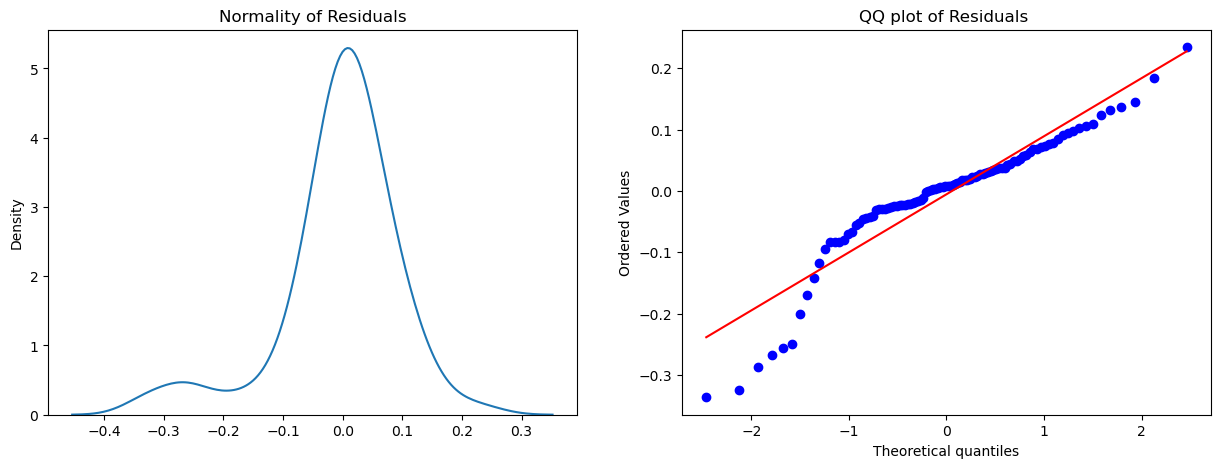

In [52]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,2,1)
sns.kdeplot(x = residuals)
plt.title('Normality of Residuals')

import scipy as sp
ax = fig.add_subplot(1,2,2)
sp.stats.probplot(residuals,plot = plt)
plt.title('QQ plot of Residuals ')
plt.show()


    Comments -
    
        1) The histogram shows that there is a negative skew in the distribution of residuals 
        
        but it is close to a normal distribution

        2) The QQ plot shows that residuals are slightly deviating from the straight diagonal.



**Actionable Insights & Recommendations -**


    Insights -
    
        1) From the model coefficients (weights), we can conclude that CGPA is the most significant predictor variable 
        
        while university Rating is the least significant.
        
        
        2) Exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit. 
        
        These variables are also highly correlated amongst themselves.
         
         
        3) The categorical variables such as university ranking, research, SOP and LOR also show an upward trend 
        
        for chances of admit.      
        
        
        4) The distribution of target variable (chances of admit) is left-skewed        
        
        
        5) The predictor variables have met the conditions required for Linear Regression - mean of residuals is close 
        
        to 0, linearity of variables, normality of residuals and homoscedasticity is established.        
        
        
    Recommendations -
    
        1) Since all the exam scores are highly correlated, 
        
        it is recommended to add more independent features for better prediction.


        2) Examples of other independent variables could be work experience, internships, 
        
        mock interview performance, extracurricular activities or diversity variables
  
    
        
        